# Character-level RNN for beer.stackoverflow.com

## How does an RNN work?

**1. Gather and clean training data:**

In [3]:
from xml.etree import cElementTree as ET
import sys
from HTMLParser import HTMLParser
import time

# credit: http://stackoverflow.com/questions/753052/strip-html-from-strings-in-python
class MLStripper(HTMLParser):
    def __init__(self):
        self.reset()
        self.fed = []
    def handle_data(self, d):
        self.fed.append(d)
    def get_data(self):
        return ''.join(self.fed)

def strip_tags(html):
    s = MLStripper()
    s.feed(html)
    return s.get_data()

posts = open('Posts.xml', 'r').read()

posts[1:100]

def remove_tags(text):
    return ''.join(ET.fromstring(text).itertext())

root = ET.fromstring(posts)
documents = []
t0 = time.time()
for child in root.findall('row'):
    text = None
    child_text = child.get('Body').encode('utf-8').strip()
    text = strip_tags(child_text)
    # Remove line breaks so posts are grouped together
    text = text.replace("\n","")
    documents.append(text)
t1 = time.time()    

print 'Time to parse text: ' + str(t1 - t0)
print documents[0:2]
print 'Total number of documents: ' + str(len(documents))

Time to parse text: 0.162177801132
['I was offered a beer the other day that was reportedly made with citra hops. What are citra hops? Why should I care that my beer is made with them?', 'As far as we know, when did humans first brew beer, and where? Around when would you have been able to get your hands on something resembling a modern lager?']
Total number of documents: 1694


**2. Create dictionaries mapping characters to integers and back again.**

In [4]:
all_posts = ("\n\n\n").join(documents)

print all_posts[0:1000]

data = all_posts
chars = list(set(data))
data_size, vocab_size = len(data), len(chars)
print 'data has %d characters, %d unique.' % (data_size, vocab_size)
char_to_ix = { ch:i for i,ch in enumerate(chars) }
ix_to_char = { i:ch for i,ch in enumerate(chars) }

I was offered a beer the other day that was reportedly made with citra hops. What are citra hops? Why should I care that my beer is made with them?


As far as we know, when did humans first brew beer, and where? Around when would you have been able to get your hands on something resembling a modern lager?


How is low/no alcohol beer made? I'm assuming that the beer is made normally and the alcohol is then removed, is it any more than just boiling it off? I've noticed that no/low alcohol beers' taste improved hugely a few years ago, is this due to a new technique?


Citra is a registered trademark since 2007. Citra Brand hops have fairly high alpha acids and total oil contents with a low percentage of cohumulone content and  imparts interesting citrus and tropical fruit characters to beer.For more information, you can read the Wikipedia article on the Citra brand.


In general, what's the best way to work out the temperature at which to serve a particular beer? Room temperature? Cold?

**3. Train**

1. Initialize randomized weights for each neuron
2. Backpropagate a loss for those weights, using a target class of the next character
3. Update weights via Adagrad

In [5]:
execfile('simple_rnn.py')
import time

max_iters = 1000
start = time.time()
results = train(data, vocab_size, max_iters)
losses = results['losses']
h = results['hidden_state']
end = time.time()
print "Training for " + str(max_iters) + " iterations lasted for " + str(end - start) + " seconds."

Training for 1000 iterations lasted for 1.63735580444 seconds.


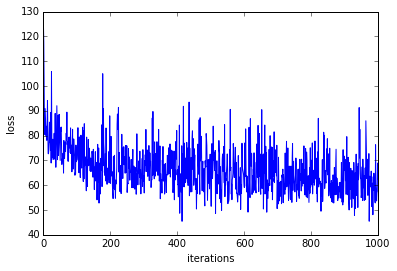

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(losses)
plt.ylabel('loss')
plt.xlabel('iterations')
plt.show()

In [7]:
nsamples = 1000
bidx = char_to_ix['l']
samples = sample(h, bidx, nsamples)
#unicode('\x80abc', errors='ignore')
("").join([unicode(ix_to_char[samples[i]], errors = 'ignore') for i in range(nsamples)])

u' inr monn ar, wicleens inr.rG9:ow tn be the te.n dos. con y  ferepe M-, iranbaf? _herole Iye boin I ber ou matlyow b? Rit swout ittathe wot., qheoned iwhe oc, roe sode Tha bee hor ithltu/d presreebist uy, b aur outtted, ioif usiconriser doy Isi matn thoe tke datge ufink sounive choe cfor yala do tuach or mas i\' on mtal i coake. mol a agre Cor an botsee Stol maultoc per woumte bededs Hud, puwitle.t be avid at he if ar ifupen.ere  2udlan bad bener to iwour, fhan wolimtali Sp nmpee atl, thcermr og o. airmes hae be k.\nBhened, ma ciAve ganf whossmy polced oanst mat I to, asdire tho ma bor wfe inon ohe pou wacey\nfa gocils toon arlis )of. dog"rhets, is lvit you s mow whe you be , wont" woittocometimvensroa Iredlo go?r ifle bua. yrev, ar thrily on b, tes s)exs menlelcinft angos meres gole toratlp chisaur ty sou vow is wod thara "5ye conos whess b. Ioved istis: t" f lcofs 2Btot thou sc pereost tha thos that acn the gheexp peello ude difusy "us. yam son syiantud ccoiomet,s, the a belalaer. 